In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import datetime, calendar, time
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.ticker
%matplotlib inline

In [42]:
feats = []
for line in open("../stats/drcog_colorado-latest-internal.osm.pbf.geojsonseq"):
    x = json.loads(line.strip())
    feats.append(x['properties'])
df = pd.DataFrame(feats)
df['user'] = df['@user']
df['ts'] = df['@timestamp']
df['date'] = df['@timestamp'].apply(lambda x: pd.Timestamp(x*1000000000).date())

In [43]:
df.head(1)

,@changeset,@id,@timestamp,@type,@uid,@user,@version,addr:apartment,addr:city,addr:country,...,shelter_type,shop,source,tourism,website,wheelchair,wikidata,user,ts,date
0,58601796,5591508023,1525237583,node,227972,Your Village Maps,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Your Village Maps,1525237583,2018-05-02


In [26]:
df['@id'].count(), df['@id'].nunique(), df['@user'].nunique()

Show the growth of some buildings...

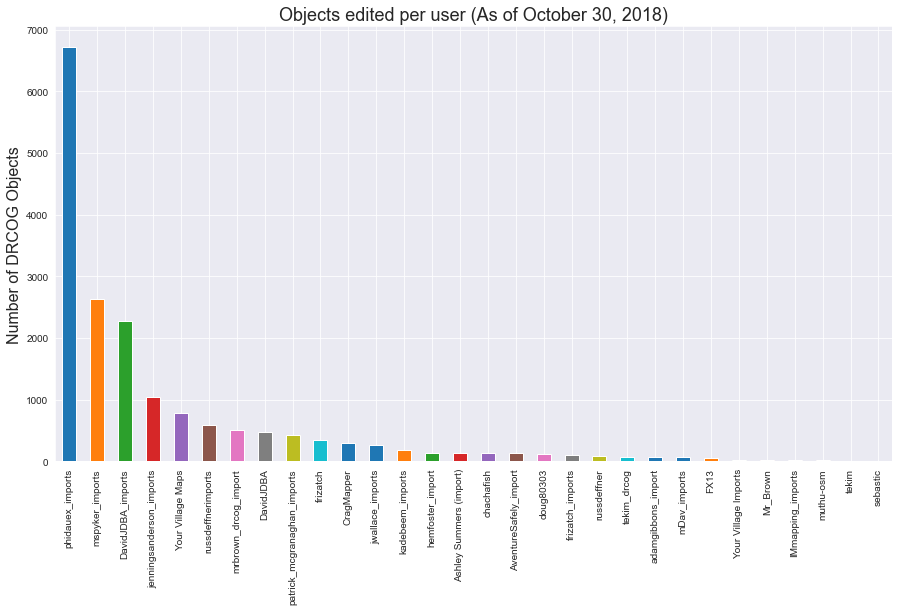

In [56]:
sns.set_style('darkgrid')
ax = df.user.value_counts().plot(kind='bar', figsize=(15,8))
ax.set_ylabel("Number of DRCOG Objects",fontsize=16)
ax.set_title("Objects edited per user (As of October 30, 2018)",fontsize=18);

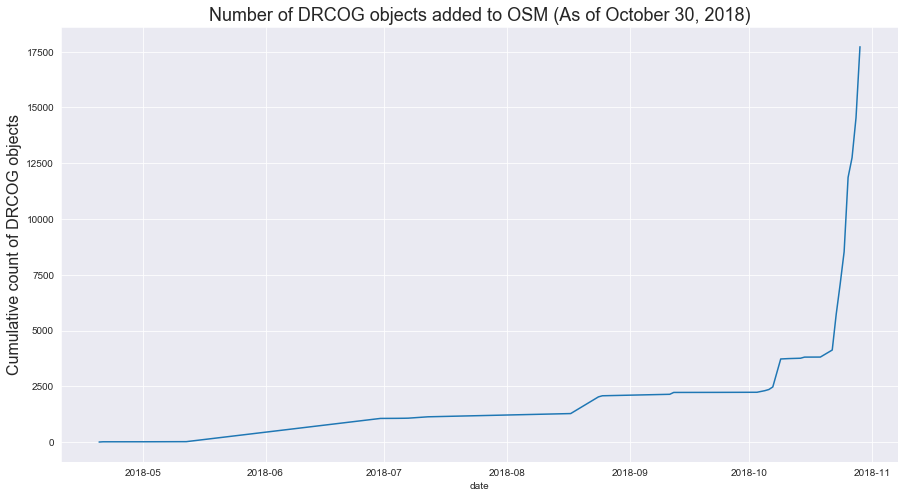

In [62]:
sns.set_style('darkgrid')
ax = df.groupby('date').aggregate({'@id':'count'}).cumsum().plot(figsize=(15,8),legend=None)
ax.set_ylabel("Cumulative count of DRCOG objects", fontsize=16)
ax.set_title("Number of DRCOG objects added to OSM (As of October 30, 2018)",fontsize=18);

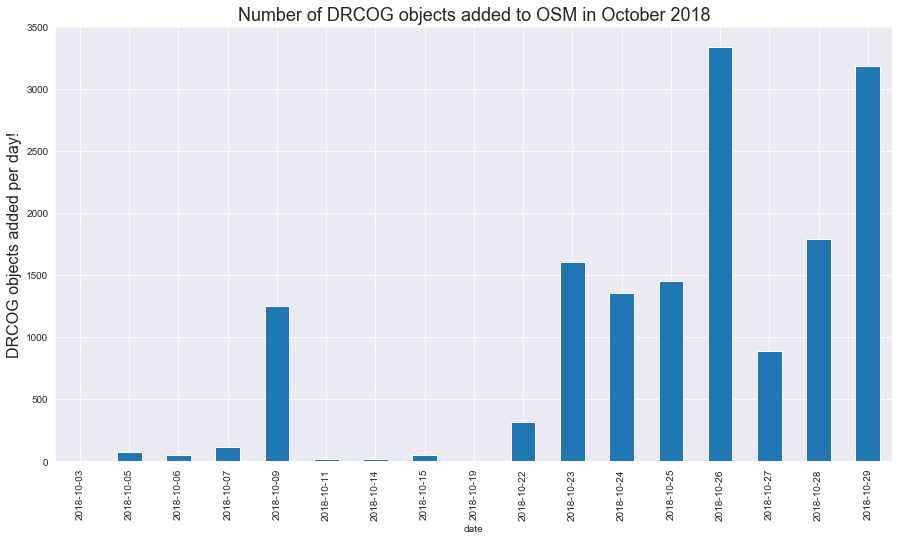

In [92]:
sns.set_style('darkgrid')
ax = df[df.date > datetime.date(2018,10,1)].groupby('date').aggregate({'@id':'count'}).plot(kind='bar',figsize=(15,8),legend=None)
ax.set_ylabel("DRCOG objects added per day!", fontsize=16)
ax.set_title("Number of DRCOG objects added to OSM in October 2018",fontsize=18);

In [139]:
combined_df = []
count =0;
for u,items in df[df.date > datetime.date(2018,10,1)].groupby('user'):
    if len(items)>0:
        new_df = items.groupby('date').aggregate({"@id":'count'})
        new_df.columns=[u]
        if count==0:
            combined_df = new_df
        else:
            combined_df = combined_df.join(new_df, how='outer')
        count+=1


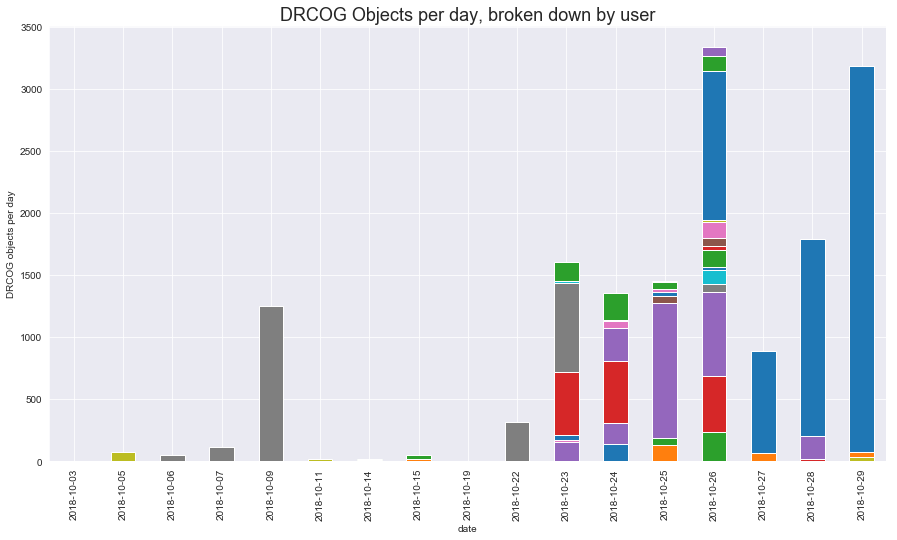

In [143]:
ax = combined_df.plot(kind='bar',stacked=True,figsize=(15,8),legend=False)
ax.set_ylabel("DRCOG objects per day")
ax.set_title("DRCOG Objects per day, broken down by user",fontsize=18);

In [117]:
new_df.head()

,tekim_drcog
date,
2018-10-26,74


In [97]:
df[df.date > datetime.date(2018,10,1)].count()

@changeset           15498
@id                  15498
@timestamp           15498
@type                15498
@uid                 15498
@user                15498
@version             15498
addr:apartment           0
addr:city            14123
addr:country             0
addr:housename           0
addr:housenumber     10217
addr:postcode        14122
addr:state           14122
addr:street          10292
addr:unit                1
alt_name                 1
amenity                 21
attraction               0
barrier                  0
building             15495
building:colour          2
building:levels         11
cuisine                  1
denomination             6
ele                     13
emergency                1
fixme                    1
gnis:county_id          12
gnis:created            12
                     ...  
gnis:state_id           12
height               15498
heritage                 1
heritage:operator        1
historic                 1
landuse                 76
l

In [261]:
gb_user = buildings.groupby('user').aggregate({'validSince':min, 'validUntil':max, 'version':'count','id':'nunique'})

In [268]:
gb_user['firstBuilding'] = gb_user.validSince.apply(lambda t: pd.Timestamp(t*1000000000).date())
gb_user['lastBuilding'] = gb_user.validUntil.apply(lambda t: pd.Timestamp(t*1000000000).date())

In [270]:
gb_user.head()

,validSince,validUntil,version,id,firstBuilding,lastBuilding
user,,,,,,
$agar11,1461967263,1535673544,7,6,2016-04-29,2018-08-30
+rama,1424001018,1424248590,1,1,2015-02-15,2015-02-18
-Christoph-,1429983843,1535673544,463,463,2015-04-25,2018-08-30
0109,1430289805,1431014646,1,1,2015-04-29,2015-05-07
048,1430455711,1535673544,40,40,2015-05-01,2018-08-30


Text(0.5,1,'Timespan of OSM Contributions to Buildings in Nepal')

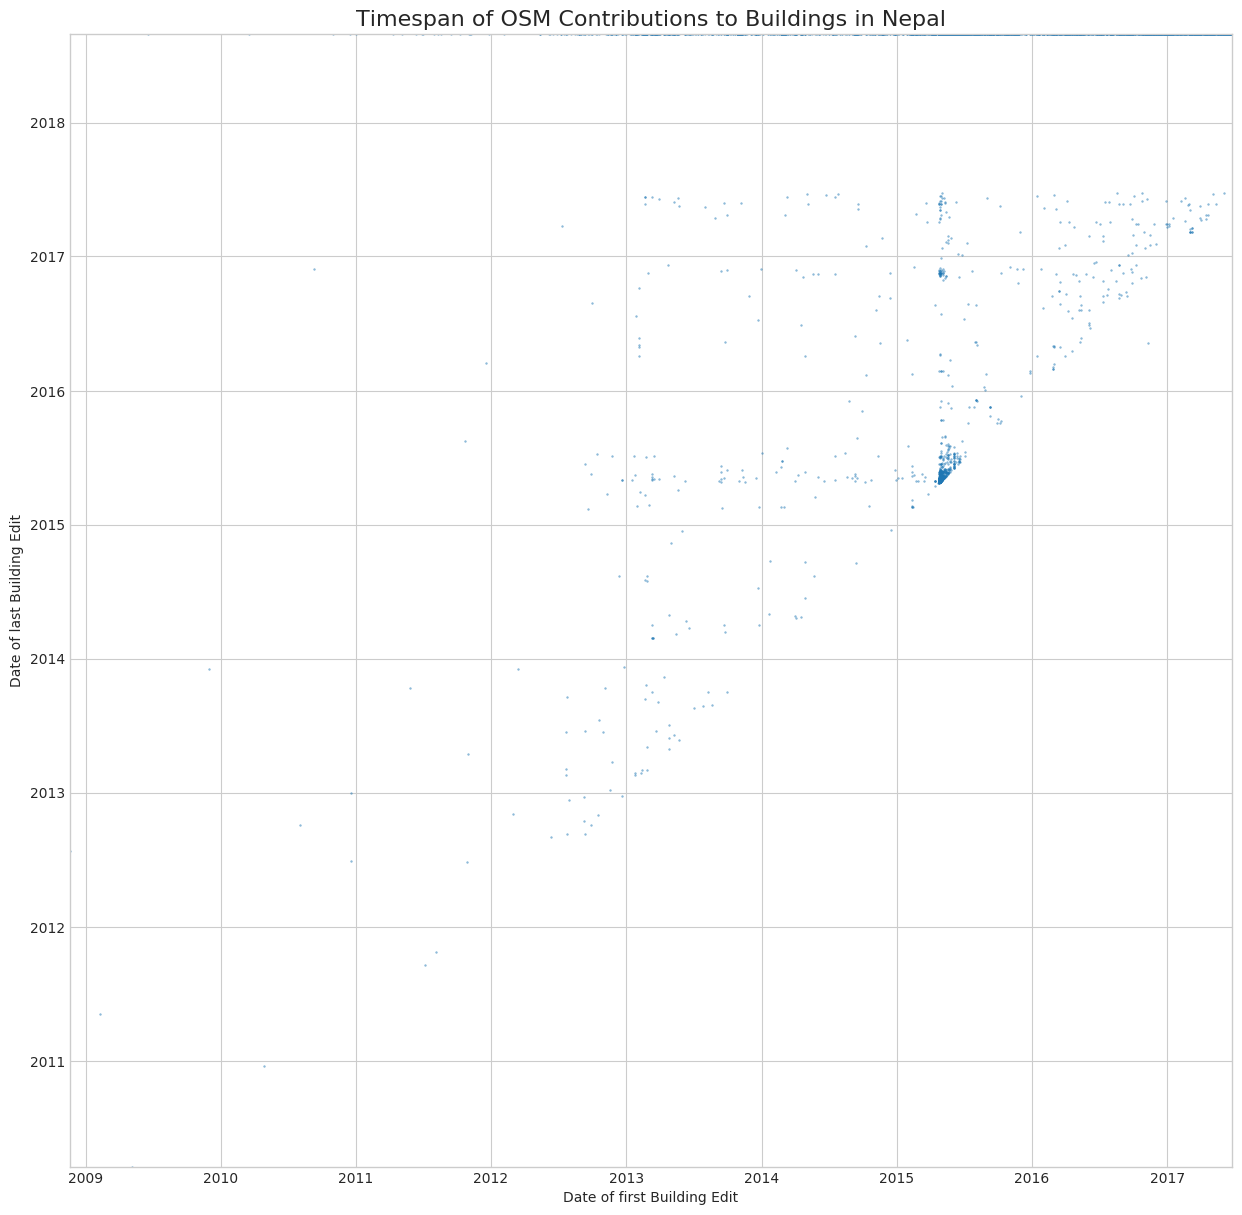

In [275]:
sns.set_style('whitegrid')
plt.figure(num=None, figsize=(15, 15), dpi=100, facecolor='w', edgecolor='k')
plt.plot(gb_user['firstBuilding'], gb_user['lastBuilding'], '+', markersize=2, alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(mdates.YearLocator())
plt.xlim([gb_user.firstBuilding.min() , gb_user.firstBuilding.max()])
plt.ylim([gb_user.lastBuilding.min(), gb_user.lastBuilding.max()])
plt.xlabel('Date of first Building Edit')
plt.ylabel('Date of last Building Edit')
plt.title("Timespan of OSM Contributions to Buildings in Nepal",fontsize=16)
# plt.savefig('/data/www/jennings/osm-timespans.png')

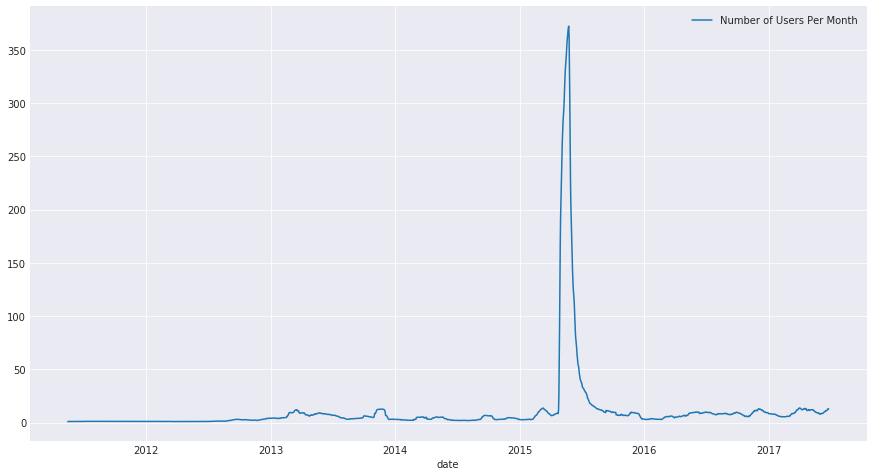

In [310]:
ax = gb_dates.user.rolling(30).mean().plot(figsize=(15,8))
ax.legend(["Number of Users Per Month"])

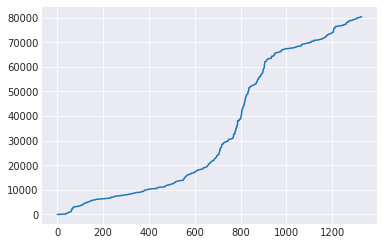

In [337]:
buildings.groupby('date',as_index=False).aggregate({'user':pd.Series.nunique, 'version':sum}).version.cumsum().plot()